In [1]:
#%matplotlib inline

# Import all the programs we want to use. If this gives an error, then you need to add these to your python path.

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
#import holopy as hp
import os
#import av
import scipy
import scipy.optimize as sco
import seaborn

from matplotlib.backends.backend_pdf import PdfPages

%pylab inline 
# tell python how to display images

#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
scaling =  0.08431 #um/pixel
mpp = scaling
fps = 11.935
moviename = 'tracer+janus_3%_H2O2_5(green)2016-06-14'

In [3]:
os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\analysis')

In [4]:
t1 = pd.read_pickle('filtered_data_tracer+janus_3%_H2O2_5(green)2016-06-14_pickled.pkl')

In [5]:
tm = pd.read_pickle('filtered_data_with_drift_subtracted_tracer+janus_3%_H2O2_5(green)2016-06-14_pickled.pkl')

In [6]:
fpscontrol = 11.959
t1control = pd.read_pickle('filtered_data_tracer+janus_no_H2O2_3(green)2016-06-14_pickled.pkl')

In [7]:
tmcontrolfilename = 'filtered_data_with_drift_subtracted_tracer+janus_no_H2O2_3(green)2016-06-14_pickled.pkl'
tmcontrol = pd.read_pickle(tmcontrolfilename)

controlmoviename = 'tracer+janus_no_H2O2_3(green)2016-06-14'

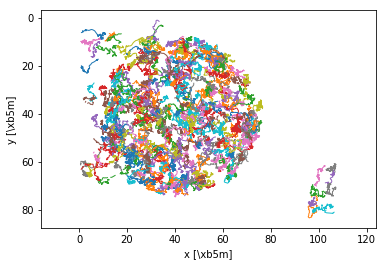

In [8]:
plt.axis('equal')
ax = tp.plot_traj(t1, mpp = scaling, legend=False)

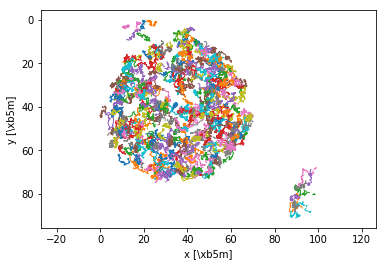

In [9]:
plt.axis('equal')
ax = tp.plot_traj(tm, mpp = scaling, legend=False)

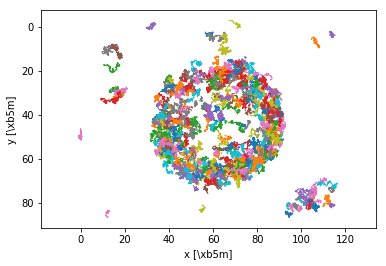

In [10]:
plt.axis('equal')
ax = tp.plot_traj(tmcontrol, mpp = scaling, legend=False)

C:\ProgramData\Anaconda2\lib\site-packages\trackpy\motion.py:270: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=0,window=15,center=False).mean()
  dx = pd.rolling_mean(dx, smoothing, min_periods=0)


Text(0.5,1,u'Translational drift in tracer+janus_3%_H2O2_5(green)2016-06-14\n')

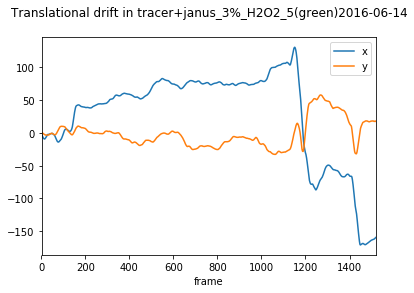

In [11]:
d = tp.compute_drift(t1, smoothing=15)

#plt.figure()
d.plot(grid=False)
plt.title('Translational drift in ' + moviename + '\n')

In [12]:
tracks = t1['particle'].astype(int).unique()

In [13]:
t1.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,335.207851,217.515802,2129.606663,4.263106,0.015743,24.735661,9744.0,0.121135,0,12.0
1,332.555782,212.905931,2400.095318,4.244409,0.022435,26.408594,9782.0,0.113745,1,12.0
2,331.783522,213.468283,1931.747908,4.380896,0.028253,19.208907,9288.0,0.140322,2,12.0
3,326.338060,211.746241,2027.142279,4.355480,0.054004,22.236171,9256.0,0.145731,3,12.0
4,320.591582,209.482554,2178.229462,4.276222,0.004696,22.954505,9362.0,0.137708,4,12.0


In [14]:
## Filter out trajectories that have imsd 0.0.

list_of_long_trajectories = []
list_of_short_trajectories = []

for i in range(size(tracks)):
    max_x = max(tm[tm['particle']==tracks[i]].x)
    min_x = min(tm[tm['particle']==tracks[i]].x)
    max_y = max(tm[tm['particle']==tracks[i]].y)
    min_y = min(tm[tm['particle']==tracks[i]].y)
    
    if isnan(max_x):
        list_of_short_trajectories.append(tracks[i])
    else:
        if isnan(max_y):
            list_of_short_trajectories.append(tracks[i])
        else:
            list_of_long_trajectories.append(tracks[i])
        
# remove each of the undesired trajectories
tm_extended = tm.copy()
for i in list_of_short_trajectories:
    tm_extended = tm_extended[tm_extended.particle != i]

print list_of_short_trajectories    

[]


In [15]:
tm = tm_extended

In [16]:
imsd_not_subtracted = tp.imsd(t1, scaling, fps, max_lagtime=1000)

In [17]:
imsd_subtracted = tp.imsd(tm, scaling, fps, max_lagtime=1000)

In [18]:
imsd_sub_control = tp.imsd(tmcontrol, scaling, fpscontrol, max_lagtime=1000)

In [19]:
emsd_not_subtracted = tp.emsd(t1, scaling, fps,max_lagtime=1000)

In [20]:
emsd_subtracted = tp.emsd(tm, scaling, fps,max_lagtime=60)

In [21]:
emsd_sub_control = tp.emsd(tmcontrol, scaling, fpscontrol,max_lagtime=60)

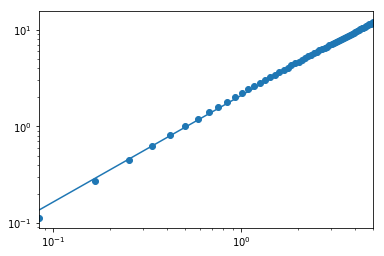

,n,A
msd,1.104948,2.102806


In [22]:
res = tp.utils.fit_powerlaw(emsd_subtracted)  # performs linear best fit in log space, plots
res

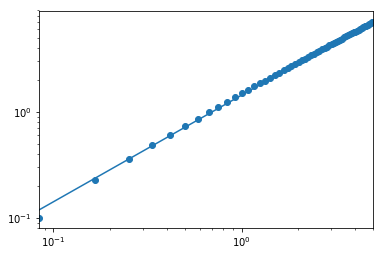

,n,A
msd,1.00399,1.433375


In [23]:
rescontrol = tp.utils.fit_powerlaw(emsd_sub_control)  # performs linear best fit in log space, plots
rescontrol

In [24]:
t0 = frange(.083787,5.027231,.1)
fit = res.A[0]*(t0**res.n[0])
fitcontrol = rescontrol.A[0]*(t0**rescontrol.n[0])

A = res.A[0]
n = res.n[0]
Acontrol = rescontrol.A[0]
ncontrol = rescontrol.n[0]

tracer+janus_3%_H2O2_5(green)2016-06-14
Coefficient A = 2.07498887583 ± 0.184834592642
Exponent n = 1.13984237375 ± 0.0679547495185

run it again with lower max lagtime 60
tracer+janus_3%_H2O2_5(green)2016-06-14
Coefficient A = 2.02746348935 ± 0.162263946613
Exponent n = 1.11760505485 ± 0.0537280062231

tracer+janus_no_H2O2_3(green)2016-06-14
Coefficient A = 1.40422386265 ± 0.0610810038731
Exponent n = 1.00279955763 ± 0.0303942205249




## copy fitting parameters from other notebook:
A = 2.02746348935
n = 1.11760505485
t0 = frange(.083787,5.027231,.1)
fit = A*(t0**n)
Acontrol = 1.40422386265
ncontrol = 1.00279955763
fitcontrol = Acontrol*(t0**ncontrol)

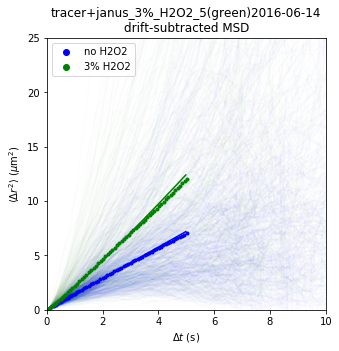

In [25]:
fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'g-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H2O2")  # dark
plot(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'g.', alpha=1, label="3% H2O2")  # dark
plot(t0,fit, 'g', alpha = 1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')

plt.ylim(0,25)
plt.xlim(0,10)
#fig.set_size_inches(5,3)
fig.set_size_inches(5,5)
plt.title(moviename + '\ndrift-subtracted MSD')
plt.legend(frameon=True,  markerscale= 2)

os.chdir('../analysis/')

pp = PdfPages('imsd_and_emsd_with_fits' + moviename + ',linear.pdf')
#plt.tight_layout()
pp.savefig(fig, bbox_inches='tight')
pp.close()

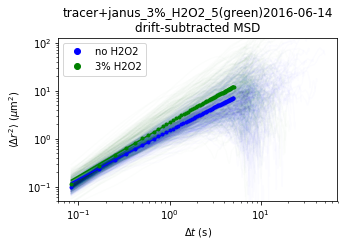

In [26]:
fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'g-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H2O2")  # dark
loglog(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'g.', alpha=1, label="3% H2O2")  # dark
loglog(t0,fit, 'g', alpha =1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(.05,125)
fig.set_size_inches(5,3)
#fig.set_size_inches(10,10)
plt.title(moviename + '\ndrift-subtracted MSD')
plt.legend(frameon=True,  markerscale= 2)

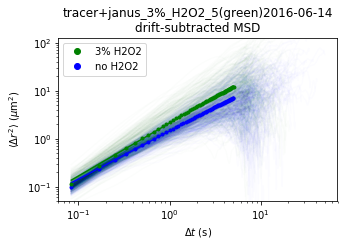

In [27]:
fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'g-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H2O2")  # dark
loglog(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'g.', alpha=1, label="3% H2O2")  # dark
loglog(t0,fit, 'g', alpha =1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(.05,125)
fig.set_size_inches(5,3)
#fig.set_size_inches(10,10)
plt.title(moviename + '\ndrift-subtracted MSD')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],frameon=True,  markerscale= 2)

tracer+janus_3%_H2O2_5(green)2016-06-14
drift-subtracted MSD
pdf saved


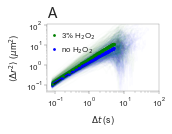

In [28]:
import seaborn as sns
sns.set(style='ticks')
sns.set_context('paper')


plt.rcParams.update({'legend.handlelength': 0})
plt.rcParams.update({'axes.titlesize' : 14 })
plt.rcParams.update({'xtick.major.size': 3 ,
                     'ytick.major.size': 3,
                     'axes.linewidth' : .2,
                     'xtick.minor.size': 1.5 ,
                     'ytick.minor.size': 1.5})

fig, ax = plt.subplots()

ax.plot(imsd_sub_control.index, imsd_sub_control, 'b-', alpha=0.01)  # semitransparent
ax.plot(imsd_subtracted.index, imsd_subtracted, 'g-', alpha=0.01)  # semitransparent

ax.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H$_2$O$_2$")  # dark
loglog(t0,fitcontrol, 'b', alpha = 1)


ax.plot(emsd_subtracted.index, emsd_subtracted, 'g.', alpha=1, label="3% H$_2$O$_2$")  # dark
loglog(t0,fit, 'g', alpha =1)

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(.05,125)
plt.xlim(xmax=100)

thisheight=2/1.618
thiswidth=2
fig.set_size_inches(thiswidth,thisheight)
#fig.set_size_inches(10,10)

print(moviename + '\ndrift-subtracted MSD')

plt.title('A', loc='left')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')

ax.tick_params(width=.3, which='major', pad=2)
ax.tick_params(width=.18, which='minor')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],frameon=False)#,  markerscale= 2)

os.chdir('C:\\Users\\Viva\\Desktop\\EPJ folder\\paperfigures')
try:
    plt.savefig('imsd_and_emsd_with_fits,janus,' + moviename + '.pdf', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    plt.savefig('imsd_and_emsd_with_fits,janus,' + moviename + '.svg', 
                bbox_inches='tight', figsize=(thiswidth, thisheight))
    print('pdf saved')
    plt.savefig('imsd_and_emsd_with_fits,janus,' + moviename + '.png', 
                bbox_inches='tight', dpi=600, figsize=(thiswidth, thisheight))
except IOError:
    print('Close the pdf file so I can overwrite it.')

In [ ]:
res

In [ ]:
rescontrol

In [ ]:
A

In [ ]:
n

In [ ]:
Acontrol

In [ ]:
ncontrol

In [ ]:
n/ncontrol

I want to try a linear fit.

In [ ]:
import scipy
import scipy.optimize as sco
from scipy.optimize import curve_fit 

In [ ]:
def linear(Dt,t):
    return 4*Dt*t

In [ ]:
Dt, Dt_pcov = curve_fit(linear, emsd_subtracted.index, emsd_subtracted)
Dt=Dt[0]
Dt
# this is in um^2/s

In [ ]:
Dt_control, Dt_control_pcov = curve_fit(linear, emsd_sub_control.index, emsd_sub_control)
Dt_control=Dt_control[0]
Dt_control
# this is in um^2/s

In [ ]:
Dt_control_pcov
# misleadingly small; these are not independent points!

In [ ]:
linearfit = 4*Dt*t0
linearfitcontrol = 4*Dt_control*t0

In [ ]:
fig, axlin = plt.subplots()
axlin.plot(emsd_sub_control.index, emsd_sub_control, 'b.', alpha=1, label="no H2O2")  # dark
axlin.plot(t0,linearfitcontrol, 'b', alpha = 1)

axlin.plot(emsd_subtracted.index, emsd_subtracted, 'g.', alpha=1, label="3% H2O2")  # dark
axlin.plot(t0,linearfit, 'g', alpha =1)

axlin.set(ylabel=r'$\langle \Delta r^2 \rangle$ ($\mu$m$^2$)',
       xlabel='$\Delta{}t$ (s)')

fig.set_size_inches(5,5)
plt.title(moviename + '\ndrift-subtracted MSD')
plt.legend(frameon=True,  markerscale= 2)

handles, labels = axlin.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],frameon=True,  markerscale= 2)

In [ ]:
moviename